# Detection of Parkinson's Disease using Ensemble methods:


Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of dementia is increased.

Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician.

Use the provided dataset in order to do your analysis.

## Attribute Information:

#### Matrix column entries (attributes):

#name - ASCII subject name and recording number

#MDVP:Fo(Hz) - Average vocal fundamental frequency

#MDVP:Fhi(Hz) - Maximum vocal fundamental frequency

#MDVP:Flo(Hz) - Minimum vocal fundamental frequency

#MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Severalmeasures of variation in fundamental frequency

#MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude

#NHR,HNR - Two measures of ratio of noise to tonal components in the voice

#status - Health status of the subject (one) - Parkinson's, (zero) - healthy

#RPDE,D2 - Two nonlinear dynamical complexity measures

#DFA - Signal fractal scaling exponent

#spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

In [2]:
# Import required library
import numpy as np
import pandas as pd
pd.options.display.max_rows=None
pd.options.display.max_columns=None

import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap

import scipy
from scipy import stats
import statsmodels.api as sm
import random
import statsmodels.stats.api as sms

from sklearn.linear_model import ElasticNet,Lasso,Ridge,SGDRegressor,LogisticRegression
from sklearn.metrics import classification_report,cohen_kappa_score,confusion_matrix
from sklearn.metrics import silhouette_score,roc_curve,roc_auc_score,log_loss,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier,StackingClassifier,RandomForestClassifier
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import StandardScaler,PowerTransformer,MinMaxScaler,LabelEncoder
from sklearn.model_selection import cross_val_score,GridSearchCV,KFold,LeaveOneOut,train_test_split

## About the dataset:

#### Reading the dataset:

In [3]:
df=pd.read_csv('/Users/deepranjanguha/Desktop/Data Science /ML-Classification/SLC Mini Projects/SLC Mini Projects 2.0/parkinsons.csv')
df.head(10)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,0.456,0.02328,0.03526,0.03243,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,0.140,0.00779,0.00937,0.01351,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,0.134,0.00829,0.00946,0.01256,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,0.191,0.01073,0.01277,0.01717,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,0.255,0.01441,0.01725,0.02444,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [3]:
print(df.info(),'\n') # Checking the info of the
print('Shape : ',df.shape,'\n')  # Checking the shape of shape
print('The no of attributes : ',df.shape[0])
print('The no of records : ',df.shape[1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [4]:
df.describe().T  # Checking the 5 point summary

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


#### Numerical and Categorical Features:

In [4]:
df_num=df.select_dtypes(np.number)
df_cat=df.select_dtypes(object)
print('The numerical features : ')
print(df_num.columns,'\n')
print('The categorical features : ')
print(df_cat.columns)

The numerical features : 
Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object') 

The categorical features : 
Index(['name'], dtype='object')


Note : We Have 23 Numerical Columns and 1 Categorical column

# Data Pre-Processing:

#### Checking and treating duplicate values:

In [6]:
# Checking the number of duplicate entries
print('Number of duplicate entries : ',df.duplicated().sum(),'\n')

Number of duplicate entries :  0 



* Hence there are no duplicate records that exist in the dataset

#### Checking the symmetry of the data:

In [7]:
df.skew()

MDVP:Fo(Hz)         0.591737
MDVP:Fhi(Hz)        2.542146
MDVP:Flo(Hz)        1.217350
MDVP:Jitter(%)      3.084946
MDVP:Jitter(Abs)    2.649071
MDVP:RAP            3.360708
MDVP:PPQ            3.073892
Jitter:DDP          3.362058
MDVP:Shimmer        1.666480
MDVP:Shimmer(dB)    1.999389
Shimmer:APQ3        1.580576
Shimmer:APQ5        1.798697
MDVP:APQ            2.618047
Shimmer:DDA         1.580618
NHR                 4.220709
HNR                -0.514317
status             -1.187727
RPDE               -0.143402
DFA                -0.033214
spread1             0.432139
spread2             0.144430
D2                  0.430384
PPE                 0.797491
dtype: float64

* The following features ahve high positive skewness:

MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),
MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,
MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR

#### Checking the presence and treatment of Null/Missing Values:

In [8]:
count=df.isna().sum()
percent=((count/df.shape[0])*100)
null=pd.DataFrame(pd.concat([count,percent],keys=['Missing values','% Missing values'],axis=1))
null

,Missing values,% Missing values
name,0,0.0
MDVP:Fo(Hz),0,0.0
MDVP:Fhi(Hz),0,0.0
MDVP:Flo(Hz),0,0.0
MDVP:Jitter(%),0,0.0
MDVP:Jitter(Abs),0,0.0
MDVP:RAP,0,0.0
MDVP:PPQ,0,0.0
Jitter:DDP,0,0.0
MDVP:Shimmer,0,0.0


* Therefore no null values exist in the dataset.

# Exploratory Data Analysis:

#### Plotting the distribution of all the features:

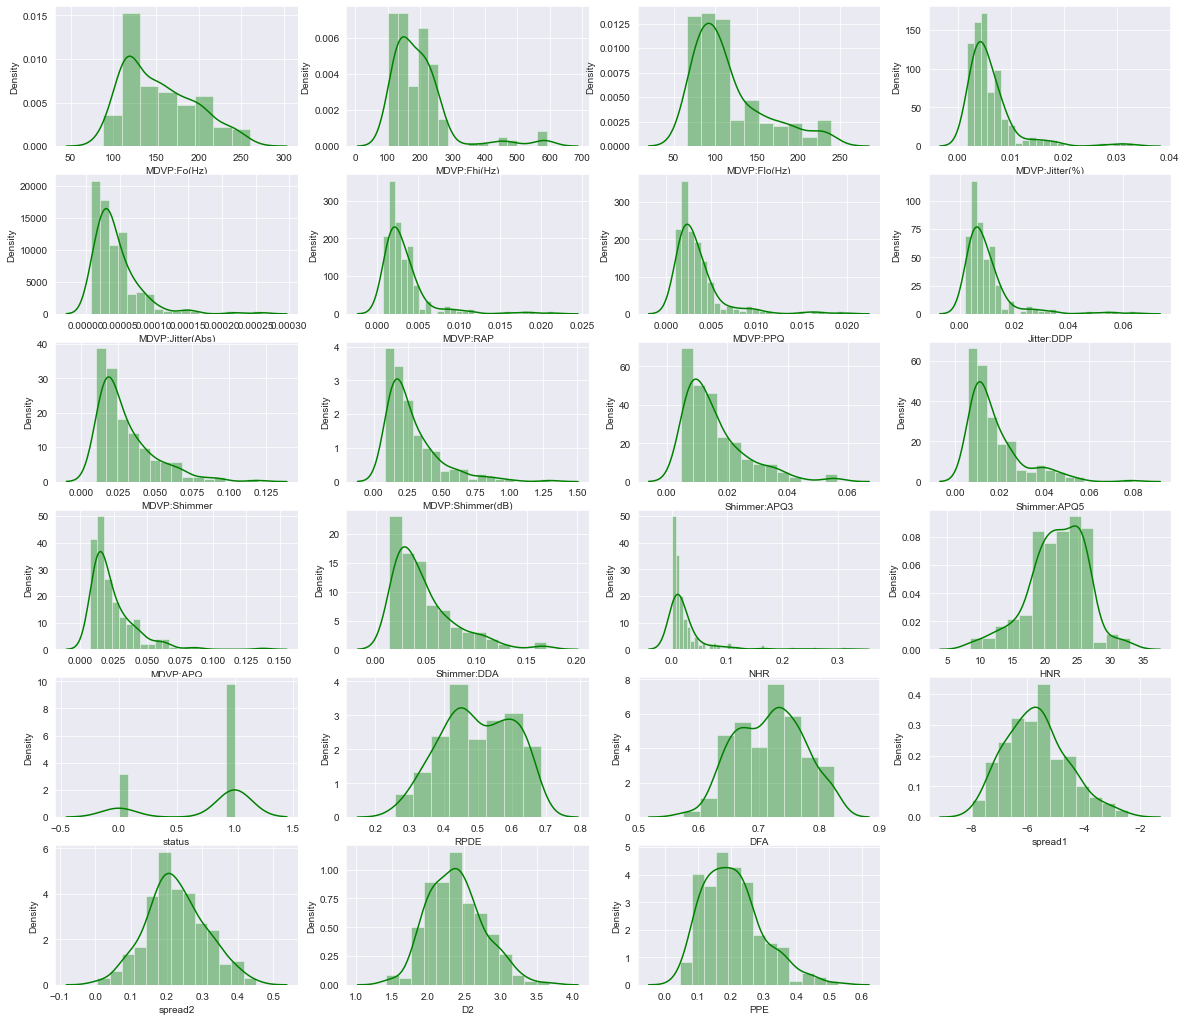

In [9]:
df_num=df.select_dtypes(np.number)
df_cat=df.select_dtypes(object)
sns.set_style('darkgrid')
plt.figure(figsize=(20,18))
j=1
for i in df_num.columns:
    plt.subplot(6,4,j)
    sns.distplot(df_num[i],color='green')
    j+=1
plt.show()

Observations:
    
* MDVP:Fo(Hz),HNR,RPDE,DFA,spread1,spread2,D2 have near normal distribution.
    
* 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)','MDVP:Jitter(Abs)', 'MDVP:RAP', 
    'MDVP:PPQ', 'Jitter:DDP','MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3','Shimmer:APQ5',
    'MDVP:APQ', 'Shimmer:DDA','NHR' have high positive skewness, hence are affected by outliers.

#### Plotting the spread of all the features:

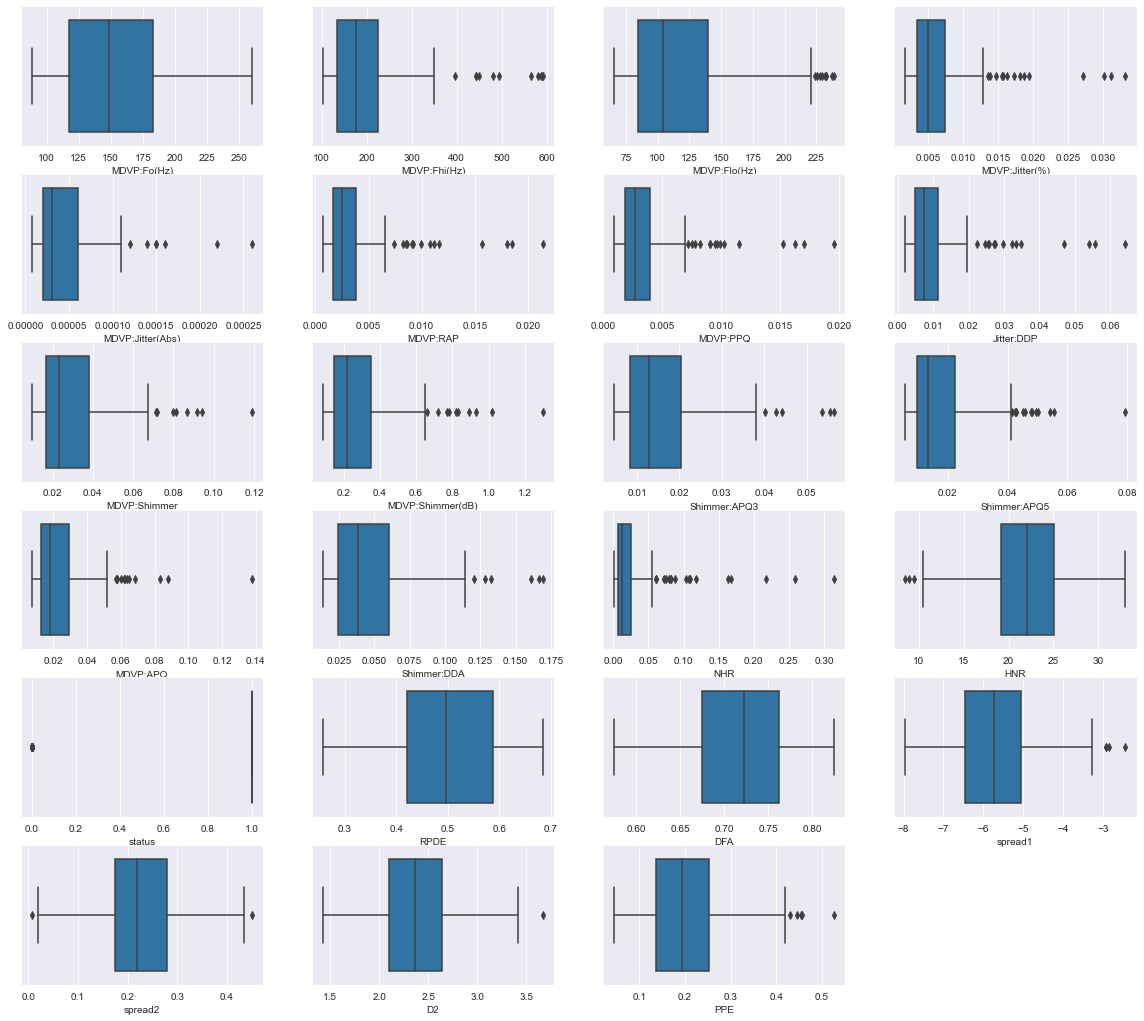

In [12]:
plt.figure(figsize=(20,18))
j=1
for i in df_num.columns:
    plt.subplot(6,4,j)
    sns.boxplot(df_num[i])
    j+=1
plt.show()

#### Pairplot Visualisation:

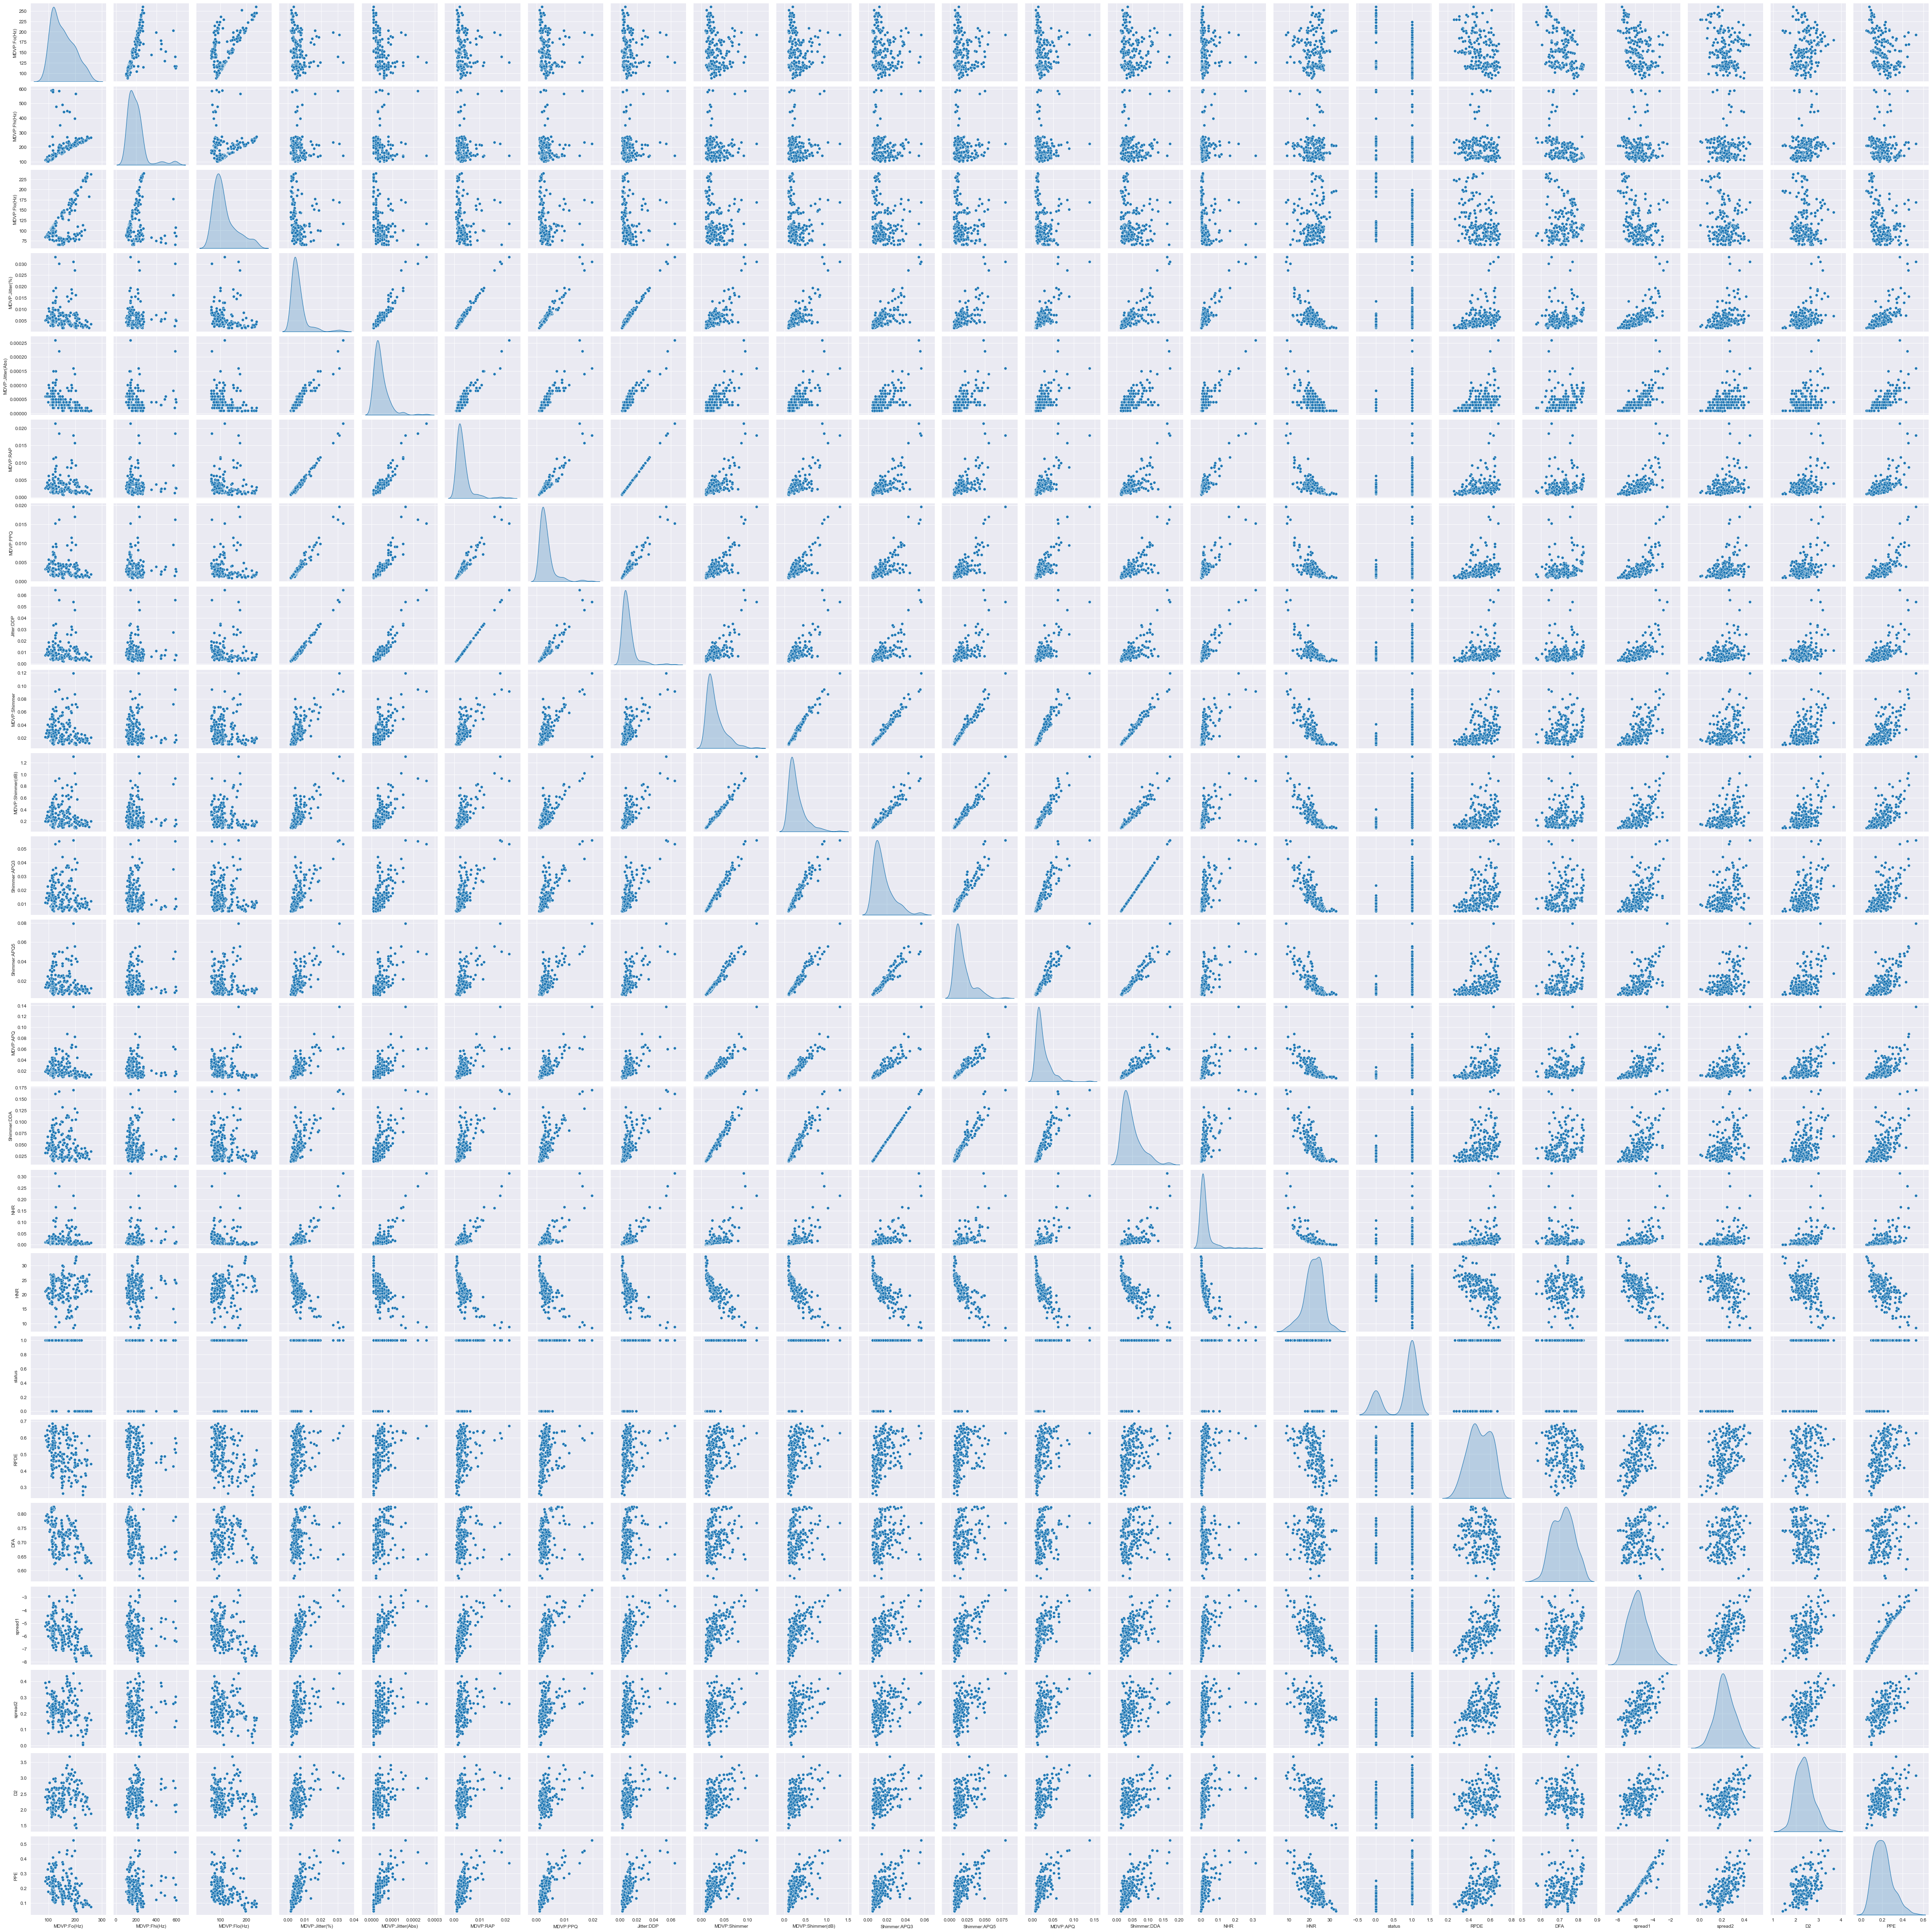

In [10]:
sns.pairplot(data=df,diag_kind='kde')

#### Correlation Matrix:

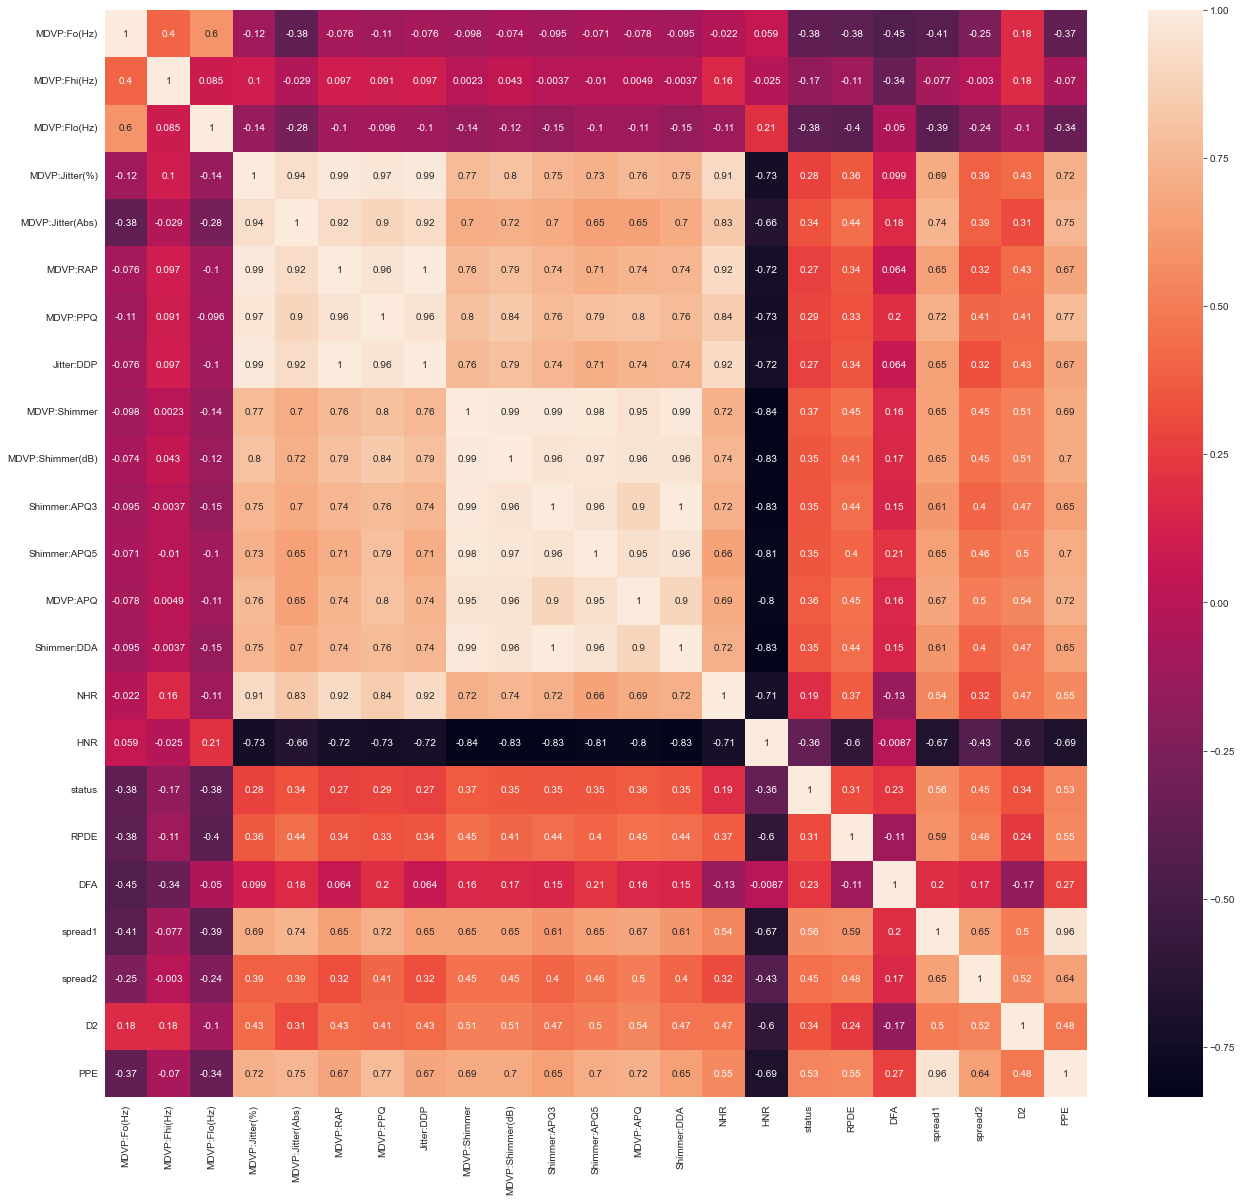

In [13]:
plt.figure(figsize=(22,20))
sns.heatmap(df_num.corr(),annot=True)
plt.show()

* There is strong multicollinearity among the independent features.

#### Checking for Class Imbalance:

Checking % of subcatgories in the Target variable(status):  

% of Positive class(1) : 
24.615384615384617 % 

% of Negative class(0) : 
75.38461538461539 %


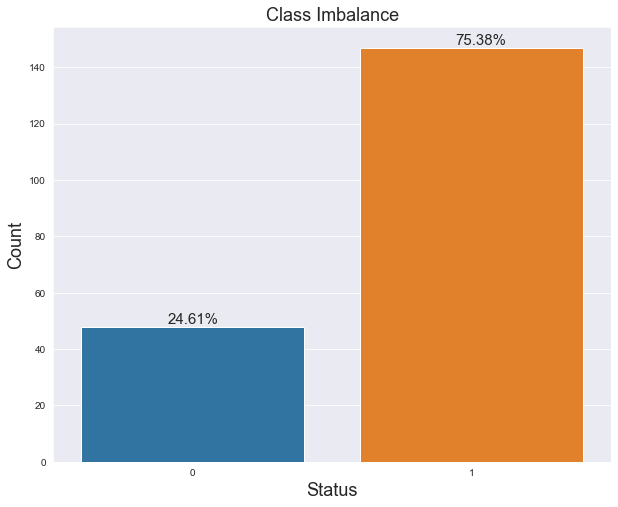

In [14]:
print('Checking % of subcatgories in the Target variable(status): ','\n')
print('% of Positive class(1) : ',)
print((df['status'].value_counts()[0]/df['status'].shape[0])*100,'%','\n')
print('% of Negative class(0) : ',)
print((df['status'].value_counts()[1]/df['status'].shape[0])*100,'%')
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
sns.countplot(df['status'])
plt.text(x=-0.09,y=df['status'].value_counts()[0]+1,
        s='24.61%',fontsize=15);
plt.text(x=0.94,y=df['status'].value_counts()[1]+1,
        s='75.38%',fontsize=15);
plt.xlabel('Status',fontsize=18)
plt.ylabel('Count',fontsize=18)
plt.title('Class Imbalance',fontsize=18)
plt.show()

# Data Preparation:

In [12]:
X=df.drop(['name','status'],axis=1)
y=df[['status']]

# Splitting dataset into training & test dataset:

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
print('X_train :',X_train.shape)
print('y_train :',y_train.shape)
print('X_test :',X_test.shape)
print('y_test :',y_test.shape)

X_train : (156, 22)
y_train : (156, 1)
X_test : (39, 22)
y_test : (39, 1)


# Predictive Modelling:

#### Training the base Decision Tree model:

In [23]:
dt = DecisionTreeClassifier(criterion='entropy',random_state=10)
dt_model = dt.fit(X_train,y_train)
ypredtrain_dt=dt_model.predict(X_train)
ypred_dt=dt_model.predict(X_test)
print(dt_model)
print('Training completed.')
print('---------------------------------------------------------------------------------------------------------------------------')
##################################################
print('                                                     Model Evaluation','\n')
print("Accuracy of train data : ",accuracy_score(y_train,ypredtrain_dt))
print("Accuracy of test data : ",accuracy_score(y_test,ypred_dt),'\n')
print('Confusion matrix : ')
print(confusion_matrix(y_test,ypred_dt),'\n')
print('\n','Classification_report of Decision Tree Model for train data :')
print('--------------------------------------------------------------')
print(classification_report(y_train,ypredtrain_dt))
print('\n','Classification_report of Decision Tree Model for test data :')
print('--------------------------------------------------------------')
print(classification_report(y_test,ypred_dt))

DecisionTreeClassifier(criterion='entropy', random_state=10)
Training completed.
---------------------------------------------------------------------------------------------------------------------------
                                                     Model Evaluation 

Accuracy of train data :  1.0
Accuracy of test data :  0.9743589743589743 

Confusion matrix : 
[[11  0]
 [ 1 27]] 


 Classification_report of Decision Tree Model for train data :
--------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00       119

    accuracy                           1.00       156
   macro avg       1.00      1.00      1.00       156
weighted avg       1.00      1.00      1.00       156


 Classification_report of Decision Tree Model for test data :
--------------------------------------------------------------
              precision   

* Accuracy of train data :  100.00%
  
  Accuracy of test data :  97.43%
  
* For train data :    

    - Precision : 100% 

    - Recall : 100%%

    - f1-weighted average : 100% 
    
* For test data :

    - Precision : 98%

    - Recall : 97%

    - f1-weighted average : 97%


#### Hyperparameter Tunning the base Decision Tree Model:

In [419]:
tune_params=[{'max_depth': range(2,6),'min_samples_split':range(2,5),
              'min_samples_leaf':range(2,5)}]
dt=DecisionTreeClassifier(random_state=10)
k=KFold(n_splits=5,shuffle=True,random_state=10)
grid=GridSearchCV(estimator=dt,param_grid=tune_params,cv=k,scoring='f1_weighted')
model=grid.fit(X_train,y_train)
model.best_params_

{'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2}

* The following best parameters has been obtained using Grid search Cross Validation method:

    'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2

#### Refitting the base model with tunned parameters:

In [15]:
dt = DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_leaf=3,
                           min_samples_split=2,random_state=10)
dt_model1 = dt.fit(X_train,y_train)
ypredtrain_dt=dt_model1.predict(X_train)
ypred_dt=dt_model1.predict(X_test)
print(dt_model1)
print('Training completed.')
print('---------------------------------------------------------------------------------------------------------------------------')
##################################################
print('                                                     Model Evaluation','\n')
print("Accuracy of train data : ",accuracy_score(y_train,ypredtrain_dt))
print("Accuracy of test data : ",accuracy_score(y_test,ypred_dt),'\n')
print('Confusion matrix : ')
print(confusion_matrix(y_test,ypred_dt),'\n')
print('\n','Classification_report of Decision Tree Model for train data :')
print('-------------------------------------------------------------')
print(classification_report(y_train,ypredtrain_dt))
print('\n','Classification_report of Decision Tree Model for test data :')
print('-------------------------------------------------------------')
print(classification_report(y_test,ypred_dt))

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3,
                       random_state=10)
Training completed.
---------------------------------------------------------------------------------------------------------------------------
                                                     Model Evaluation 

Accuracy of train data :  0.9807692307692307
Accuracy of test data :  0.9487179487179487 

Confusion matrix : 
[[10  1]
 [ 1 27]] 


 Classification_report of Decision Tree Model for train data :
-------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        37
           1       0.98      1.00      0.99       119

    accuracy                           0.98       156
   macro avg       0.99      0.96      0.97       156
weighted avg       0.98      0.98      0.98       156


 Classification_report of Decision Tree Model for test data :
-------------------

* Accuracy of train data :  98.00%
  
  Accuracy of test data :  94.87%
  
* For train data :    

    - Precision : 98% 

    - Recall : 98%

    - f1-weighted average : 98% 
    
* For test data :

    - Precision : 95%

    - Recall : 95%

    - f1-weighted average : 95%

# Feature Engineering:

#### Feature Selection:

In [16]:
features_imp=pd.DataFrame({'Features':X_train.columns,'Score':dt.feature_importances_})
features_imp[features_imp['Score']>0]

,Features,Score
0,MDVP:Fo(Hz),0.175245
1,MDVP:Fhi(Hz),0.091674
2,MDVP:Flo(Hz),0.052553
10,Shimmer:APQ3,0.052795
12,MDVP:APQ,0.148480
13,Shimmer:DDA,0.012147
14,NHR,0.032101
16,RPDE,0.077796
20,D2,0.074223
21,PPE,0.282987


#### Recursive Feature Elimination:

In [17]:
rfe=RFE(estimator=DecisionTreeClassifier(),n_features_to_select=None,step=1,verbose=0)
rfe_model=rfe.fit(X_train,y_train)
features_data=pd.DataFrame({'Features':X.columns,'Rank':rfe_model.ranking_})
features_data[features_data['Rank']==1]

,Features,Rank
0,MDVP:Fo(Hz),1
1,MDVP:Fhi(Hz),1
11,Shimmer:APQ5,1
13,Shimmer:DDA,1
15,HNR,1
16,RPDE,1
17,DFA,1
18,spread1,1
19,spread2,1
20,D2,1


#### Refitting the base model with important features:

In [24]:
Xnew=X[['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Shimmer(dB)','MDVP:APQ','Shimmer:APQ3','NHR',
     'HNR','RPDE','D2','PPE']]
ynew=df[['status']]
Xnew_train,Xnew_test,ynew_train,ynew_test=train_test_split(Xnew,ynew,test_size=0.2,random_state=10)
print('X_train :',Xnew_train.shape)
print('y_train :',ynew_train.shape)
print('X_test :',Xnew_test.shape)
print('y_test :',ynew_test.shape,'\n')

dt = DecisionTreeClassifier(criterion='entropy',random_state=10)
dt_model2 = dt.fit(Xnew_train,ynew_train)
ynewpredtrain_dt=dt_model2.predict(Xnew_train)
ynewpred_dt=dt_model2.predict(Xnew_test)
print(dt_model2)
print('Training completed.')
print('---------------------------------------------------------------------------------------------------------------------------')
##################################################
print('                                                     Model Evaluation','\n')
print("Accuracy of train data : ",accuracy_score(ynew_train,ynewpredtrain_dt))
print("Accuracy of test data : ",accuracy_score(ynew_test,ynewpred_dt),'\n')
print('Confusion matrix : ')
print(confusion_matrix(ynew_test,ynewpred_dt),'\n')
print('\n','Classification_report of Decision Tree Model for train data :')
print('-------------------------------------------------------------')
print(classification_report(ynew_train,ynewpredtrain_dt))
print('\n','Classification_report of Decision Tree Model :')
print('----------------------------------------------')
print(classification_report(ynew_test,ynewpred_dt))

##################################################
k=KFold(n_splits=5,shuffle=True,random_state=10)
scores = cross_val_score(dt,Xnew_train,ynew_train,scoring='f1_weighted',cv=k)
bias = 1-np.mean(scores)
variance = np.std(scores)/np.mean(scores)
print('BIAS error : ',round(bias,2)*100)
print('Variance error :',round(variance,2)*100)

X_train : (156, 10)
y_train : (156, 1)
X_test : (39, 10)
y_test : (39, 1) 

DecisionTreeClassifier(criterion='entropy', random_state=10)
Training completed.
---------------------------------------------------------------------------------------------------------------------------
                                                     Model Evaluation 

Accuracy of train data :  1.0
Accuracy of test data :  0.9487179487179487 

Confusion matrix : 
[[10  1]
 [ 1 27]] 


 Classification_report of Decision Tree Model for train data :
-------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00       119

    accuracy                           1.00       156
   macro avg       1.00      1.00      1.00       156
weighted avg       1.00      1.00      1.00       156


 Classification_report of Decision Tree Model :
----------------------------

* Accuracy of train data :  100%
  
  Accuracy of test data :  94.87%
  
* For train data :    

    - Precision : 100% 

    - Recall : 100%

    - f1-weighted average : 100% 
    
* For test data :

    - Precision : 95%

    - Recall : 95%

    - f1-weighted average : 95%

#### Refitting the base model with selected features:

In [25]:
Xnew=X[['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','Shimmer:APQ5','Shimmer:DDA','NHR',
     'HNR','RPDE','spread1','spread2','D2','PPE']]
ynew=df[['status']]
Xnew_train,Xnew_test,ynew_train,ynew_test=train_test_split(Xnew,ynew,test_size=0.2,random_state=10)
print('X_train :',Xnew_train.shape)
print('y_train :',ynew_train.shape)
print('X_test :',Xnew_test.shape)
print('y_test :',ynew_test.shape,'\n')

dt = DecisionTreeClassifier(criterion='entropy',random_state=10)
dt_model3 = dt.fit(Xnew_train,ynew_train)
ynewpredtrain_dt=dt_model3.predict(Xnew_train)
ynewpred_dt=dt_model3.predict(Xnew_test)
print(dt_model3)
print('Training completed.')
print('---------------------------------------------------------------------------------------------------------------------------')

##################################################
print('                                                     Model Evaluation','\n')
print("Accuracy of train data : ",accuracy_score(ynew_train,ynewpredtrain_dt))
print("Accuracy of test data : ",accuracy_score(ynew_test,ynewpred_dt),'\n')
print('Confusion matrix : ')
print(confusion_matrix(ynew_test,ynewpred_dt),'\n')
print('\n','Classification_report of Decision Tree Model for train data :')
print('-------------------------------------------------------------')
print(classification_report(ynew_train,ynewpredtrain_dt))
print('\n','Classification_report of Decision Tree Model :')
print('----------------------------------------------')
print(classification_report(ynew_test,ynewpred_dt))

##################################################
k=KFold(n_splits=5,shuffle=True,random_state=10)
scores = cross_val_score(dt,Xnew_train,ynew_train,scoring='f1_weighted',cv=k)
bias = 1-np.mean(scores)
variance = np.std(scores)/np.mean(scores)
print('BIAS error : ',round(bias,2)*100)
print('Variance error :',round(variance,2)*100)

X_train : (156, 11)
y_train : (156, 1)
X_test : (39, 11)
y_test : (39, 1) 

DecisionTreeClassifier(criterion='entropy', random_state=10)
Training completed.
---------------------------------------------------------------------------------------------------------------------------
                                                     Model Evaluation 

Accuracy of train data :  1.0
Accuracy of test data :  0.9487179487179487 

Confusion matrix : 
[[10  1]
 [ 1 27]] 


 Classification_report of Decision Tree Model for train data :
-------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00       119

    accuracy                           1.00       156
   macro avg       1.00      1.00      1.00       156
weighted avg       1.00      1.00      1.00       156


 Classification_report of Decision Tree Model :
----------------------------

* Accuracy of train data :  100%
  
  Accuracy of test data :  94.87%
  
* For train data :    

    - Precision : 100% 

    - Recall : 100%

    - f1-weighted average : 100% 
    
* For test data :

    - Precision : 95%

    - Recall : 95%

    - f1-weighted average : 95%

#### Hyperparameter Tunning the Refitted Decision model with Important Features:

In [525]:
tune_params=[{'max_depth': range(2,8),'min_samples_split':range(2,10),
              'min_samples_leaf':range(2,10)}]
dt=DecisionTreeClassifier(random_state=10)
k=KFold(n_splits=5,shuffle=True,random_state=10)
grid=GridSearchCV(estimator=dt,param_grid=tune_params,cv=k,scoring='f1_weighted')
model=grid.fit(Xnew_train,ynew_train)
model.best_params_

{'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 2}

#### Training a new Decision Tree model with important features and tunned parameters.

In [20]:
dt = DecisionTreeClassifier(criterion='entropy',max_depth=7,min_samples_leaf=3,
                           min_samples_split=2,random_state=10)
dt_model = dt.fit(Xnew_train,ynew_train)
ynewpredtrain_dt=dt_model.predict(Xnew_train)
ynewpred_dt=dt_model.predict(Xnew_test)
print(dt_model)
print('Training completed.')
print('---------------------------------------------------------------------------------------------------------------------------')
##################################################
print('                                                     Model Evaluation','\n')
print("Accuracy of train data : ",accuracy_score(ynew_train,ynewpredtrain_dt))
print("Accuracy of test data : ",accuracy_score(ynew_test,ynewpred_dt),'\n')
print('Confusion matrix : ')
print(confusion_matrix(ynew_test,ynewpred_dt),'\n')
print('\n','Classification_report of Decision Tree Model for train data :')
print('-----------------------------------------------------------------')
print(classification_report(ynew_train,ynewpredtrain_dt))
print('\n','Classification_report of Decision Tree Model for test data :')
print('-----------------------------------------------------------------')
print(classification_report(ynew_test,ynewpred_dt),'\n')

##################################################
k=KFold(n_splits=5,shuffle=True,random_state=10)
scores = cross_val_score(dt,Xnew_train,ynew_train,scoring='f1_weighted',cv=k)
bias = 1-np.mean(scores)
variance = np.std(scores)/np.mean(scores)
print('BIAS error : ',round(bias,2)*100)
print('Variance error :',round(variance,2)*100)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=3,
                       random_state=10)
Training completed.
---------------------------------------------------------------------------------------------------------------------------
                                                     Model Evaluation 

Accuracy of train data :  0.967948717948718
Accuracy of test data :  0.9487179487179487 

Confusion matrix : 
[[10  1]
 [ 1 27]] 


 Classification_report of Decision Tree Model for train data :
-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        37
           1       0.97      0.98      0.98       119

    accuracy                           0.97       156
   macro avg       0.96      0.95      0.96       156
weighted avg       0.97      0.97      0.97       156


 Classification_report of Decision Tree Model for test data :
----------------

* Accuracy of train data :  98.00%
  
  Accuracy of test data :  94.87%
  
* For train data :    

    - Precision : 98% 

    - Recall : 98%

    - f1-weighted average : 98% 
    
* For test data :

    - Precision : 95%

    - Recall : 95%

    - f1-weighted average : 95%

## Ensemble Algorithm:

#### Training a Random Forest Model:

In [26]:
rf=RandomForestClassifier(criterion='entropy',random_state=10)
model=rf.fit(Xnew_train,ynew_train)
ynewtrain_pred=model.predict(Xnew_train)
ynew_pred=model.predict(Xnew_test)
print(model)
print('Training completed.')
print('---------------------------------------------------------------------------------------------------------------------------')
##################################################
print('                                                     Model Evaluation','\n')
print("Accuracy of train data : ",accuracy_score(ynew_train,ynewtrain_pred))
print("Accuracy of test data : ",accuracy_score(ynew_test,ynew_pred),'\n')
print('Confusion matrix : ')
print(confusion_matrix(ynew_test,ynew_pred),'\n')
print('\n','Classification_report of Random Forest Model for train data :')
print('-----------------------------------------------------------------')
print(classification_report(ynew_train,ynewtrain_pred))
print('\n','Classification_report of Random Forest Model for test data :')
print('-----------------------------------------------------------------')
print(classification_report(ynew_test,ynew_pred),'\n')

##################################################
k=KFold(n_splits=5,shuffle=True,random_state=10)
scores = cross_val_score(rf,Xnew_train,ynew_train,scoring='f1_weighted',cv=k)
bias = 1-np.mean(scores)
variance = np.std(scores)/np.mean(scores)
print('BIAS error : ',round(bias,2)*100)
print('Variance error :',round(variance,2)*100)

RandomForestClassifier(criterion='entropy', random_state=10)
Training completed.
---------------------------------------------------------------------------------------------------------------------------
                                                     Model Evaluation 

Accuracy of train data :  1.0
Accuracy of test data :  1.0 

Confusion matrix : 
[[11  0]
 [ 0 28]] 


 Classification_report of Random Forest Model for train data :
-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00       119

    accuracy                           1.00       156
   macro avg       1.00      1.00      1.00       156
weighted avg       1.00      1.00      1.00       156


 Classification_report of Random Forest Model for test data :
-----------------------------------------------------------------
              precision    recall  

 * Accuracy of train data :  100.00%
  
  Accuracy of test data :  100.00%
  
* For train data :    

    - Precision : 100% 

    - Recall : 100%

    - f1-weighted average : 100% 
    
* For test data :

    - Precision : 100%

    - Recall : 100%

    - f1-weighted average : 100%
    
* Bias Error :  12.0

* Variance Error : 8.0